# Labelize Algorithm

## Briefing

We prepare a dateset consisting of two random sets of geometric points in the geojson format: *PointGeomFigure* and *TextPointGeomFigure*/

The goal of the algorithm is to pair the points with the text and return the text in place of the point/

## Imports

In [315]:
import numpy as np
import pandas as pd
from scipy.spatial import distance, KDTree


import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

## Data preparation

In [316]:
exact_points = pd.read_excel("exactpoints.xlsx")
text_points = pd.read_excel("textpoints.xlsx")

exact_points.reset_index(inplace=True)
text_points.reset_index(inplace=True)

exact_points= exact_points.rename(columns = {'index':'ID_point'})
text_points= text_points.rename(columns = {'index':'ID_text'})

exact_points['key'] = 1
text_points['key'] = 1

print(exact_points.head())
print(text_points.head())

   ID_point  e_x  e_y e_geo_type  key
0         0   63   61      Point    1
1         1   48   32      Point    1
2         2    9   92      Point    1
3         3   54   27      Point    1
4         4    1   22      Point    1
   ID_text  t_x  t_y t_geo_type      text  key
0        0   59   55  TextPoint    Robert    1
1        1   41   29  TextPoint     Lilly    1
2        2    5   86  TextPoint  Jennifer    1
3        3   47   24  TextPoint      Mike    1
4        4   -3   16  TextPoint    Robert    1


<AxesSubplot:xlabel='e_x', ylabel='e_y'>

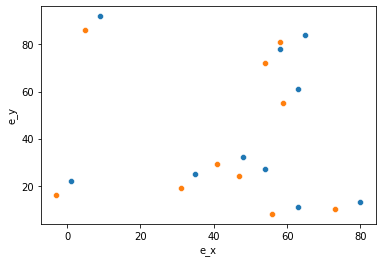

In [317]:
sns.scatterplot(data = exact_points, x = 'e_x', y = 'e_y')
sns.scatterplot(data = text_points, x = 't_x', y = 't_y')

In [318]:
compare_points = pd.merge(exact_points, text_points, on='key')[['ID_point', 'e_x', 'e_y', 'ID_text','t_x', 't_y', 't_geo_type', 'text']]

In [319]:
compare_points

,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text
0,0,63,61,0,59,55,TextPoint,Robert
1,0,63,61,1,41,29,TextPoint,Lilly
2,0,63,61,2,5,86,TextPoint,Jennifer
3,0,63,61,3,47,24,TextPoint,Mike
4,0,63,61,4,-3,16,TextPoint,Robert
...,...,...,...,...,...,...,...,...
95,9,63,11,5,73,10,TextPoint,Lilly
96,9,63,11,6,31,19,TextPoint,Robert
97,9,63,11,7,58,81,TextPoint,Robert
98,9,63,11,8,54,72,TextPoint,Jennifer


In [320]:
compare_points['range'] = ((compare_points['e_x'] - compare_points['t_x']) ** 2 +
                              (compare_points['e_y'] - compare_points['t_y']) ** 2) ** (1/2)
compare_points

,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,0,63,61,0,59,55,TextPoint,Robert,7.211103
1,0,63,61,1,41,29,TextPoint,Lilly,38.832976
2,0,63,61,2,5,86,TextPoint,Jennifer,63.158531
3,0,63,61,3,47,24,TextPoint,Mike,40.311289
4,0,63,61,4,-3,16,TextPoint,Robert,79.881162
...,...,...,...,...,...,...,...,...,...
95,9,63,11,5,73,10,TextPoint,Lilly,10.049876
96,9,63,11,6,31,19,TextPoint,Robert,32.984845
97,9,63,11,7,58,81,TextPoint,Robert,70.178344
98,9,63,11,8,54,72,TextPoint,Jennifer,61.660360


In [321]:
compare_points.sort_values(by=['range'], ascending=True, inplace=True)
compare_points.reset_index(inplace=True)

In [322]:
compare_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,87,8,58,78,7,58,81,TextPoint,Robert,3.000000
1,0,0,63,61,0,59,55,TextPoint,Robert,7.211103
2,88,8,58,78,8,54,72,TextPoint,Jennifer,7.211103
3,66,6,35,25,6,31,19,TextPoint,Robert,7.211103
4,61,6,35,25,1,41,29,TextPoint,Lilly,7.211103
...,...,...,...,...,...,...,...,...,...,...
95,92,9,63,11,2,5,86,TextPoint,Jennifer,94.810337
96,74,7,65,84,4,-3,16,TextPoint,Robert,96.166522
97,29,2,9,92,9,56,8,TextPoint,Robert,96.254870
98,25,2,9,92,5,73,10,TextPoint,Lilly,104.019229


In [323]:
closest_points = pd.DataFrame(columns=compare_points.columns)
closest_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range


In [324]:
for row in compare_points.itertuples():
    first_row = tuple(compare_points.iloc[0])
    point_id = first_row[1]
    text_id = first_row[4]    
    closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
    print("first_row")
    print(first_row)
    print(" ")
    print("************************")
    print(" ")
    compare_points.drop(compare_points[(compare_points['ID_point'] == point_id) | (compare_points['ID_text'] == text_id)].index, inplace = True)
    print("compare_points") 
    print(compare_points)
    print(" ")
    print("************************")
    print(" ")
    print("closest_points")
    print(closest_points)
    print(" ")
    print("************************")
    print(" ")

first_row
(87, 8, 58, 78, 7, 58, 81, 'TextPoint', 'Robert', 3.0)
 
************************
 
compare_points
    index  ID_point  e_x  e_y  ID_text  t_x  t_y t_geo_type      text  \
1       0         0   63   61        0   59   55  TextPoint    Robert   
3      66         6   35   25        6   31   19  TextPoint    Robert   
4      61         6   35   25        1   41   29  TextPoint     Lilly   
5      44         4    1   22        4   -3   16  TextPoint    Robert   
6      22         2    9   92        2    5   86  TextPoint  Jennifer   
..    ...       ...  ...  ...      ...  ...  ...        ...       ...   
95     92         9   63   11        2    5   86  TextPoint  Jennifer   
96     74         7   65   84        4   -3   16  TextPoint    Robert   
97     29         2    9   92        9   56    8  TextPoint    Robert   
98     25         2    9   92        5   73   10  TextPoint     Lilly   
99     52         5   80   13        2    5   86  TextPoint  Jennifer   

         range

C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Local\Temp\ipykernel_3912\257677808.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_points = closest_points.append(pd.DataFrame([first_row],columns = compare_points.columns), ignore_index=True)
C:\Users\mpiernicki\AppData\Loc

IndexError: single positional indexer is out-of-bounds

In [325]:
closest_points

,index,ID_point,e_x,e_y,ID_text,t_x,t_y,t_geo_type,text,range
0,87,8,58,78,7,58,81,TextPoint,Robert,3.0
1,0,0,63,61,0,59,55,TextPoint,Robert,7.211103
2,66,6,35,25,6,31,19,TextPoint,Robert,7.211103
3,44,4,1,22,4,-3,16,TextPoint,Robert,7.211103
4,22,2,9,92,2,5,86,TextPoint,Jennifer,7.211103
5,55,5,80,13,5,73,10,TextPoint,Lilly,7.615773
6,33,3,54,27,3,47,24,TextPoint,Mike,7.615773
7,11,1,48,32,1,41,29,TextPoint,Lilly,7.615773
8,99,9,63,11,9,56,8,TextPoint,Robert,7.615773
9,78,7,65,84,8,54,72,TextPoint,Jennifer,16.278821
